In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('paper')
sns.set_style('whitegrid')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

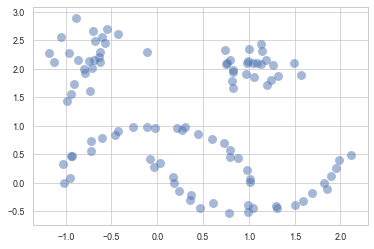

In [2]:
moons, _ = data.make_moons(n_samples=50, noise= .05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [3]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

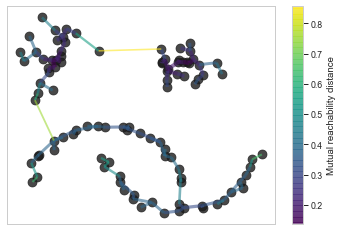

In [4]:
# Create MST
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=1.6)

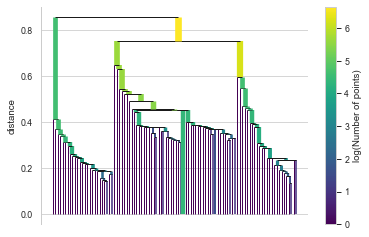

In [6]:
# Create cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

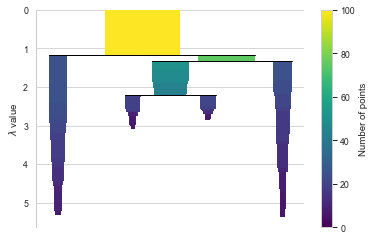

In [12]:
# Condense cluster tree
clusterer.condensed_tree_.plot()

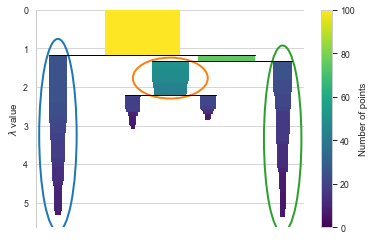

In [13]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

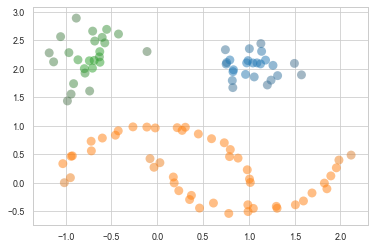

In [14]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

In [82]:
import os
import csv
from nltk.corpus import stopwords


csv_path = '/Users/edison/Downloads/amazon-fine-food-reviews'

def list_files(path):
    r = []
    for root, dirs, files in os.walk(path):
        for name in files:
            r.append(os.path.join(root, name))
    return r

def parse_into_list():
    output_list = []
    stops = set(stopwords.words("english"))
    print (stops)
    fields = [] 
    rows = [] 
    for filename in list_files(csv_path):
        with open(filename, 'r') as f:
            try:
                csvreader = csv.reader(f) 
                for row in csvreader:
                    text = row[9]
                    for sentence in text.split('.'):
                        sentence = sentence.translate({ord(c): None for c in '<>!@#$,1234567890'})
                        word_list = sentence.split(" ")
                        filtered_words = [word for word in word_list if word.lower() not in stops]
                        output_list.append(filtered_words)
            except(IOError, SyntaxError, ValueError) as e:
                continue
    return output_list
tokens = parse_into_list()
print(tokens)

{'any', "hadn't", 'they', 'ourselves', 'some', 'myself', 'wouldn', 'on', 'most', 'than', 'isn', 'had', 'where', 'couldn', "aren't", 'for', 'during', 'yours', "you'd", 'both', 'yourself', "wouldn't", 'you', "you're", 'his', 'are', "won't", 're', 'weren', 'their', 'hers', 'in', 'now', 'itself', 'how', 'above', 'the', 'were', 'ain', 'out', 'of', "should've", 'has', 'all', 'haven', "wasn't", 'each', 'through', 'himself', 'didn', 'against', 'd', 'wasn', 'down', 'more', 'at', 'those', 'too', 'again', 'only', 'same', 'was', "didn't", 'so', 'mightn', 'if', 'mustn', "it's", 'or', 'with', 'then', 'there', 'by', "mightn't", 'hadn', 'below', 'yourselves', 'its', 've', 'does', 'is', 'who', 'her', 'will', "couldn't", 'own', "weren't", 'we', "shan't", 'my', "needn't", 'll', 'and', 'that', "isn't", 'did', 's', 'until', 'can', 'needn', 'ours', "haven't", "you've", 'very', 'as', 'before', 'whom', 'ma', 'she', 'just', 'an', 'our', 'being', 'once', 'here', 'a', 'don', 'them', 'shan', 'about', 'should', 'w

In [2]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
sentences = []

path = get_tmpfile("word2vec.model")
model = Word2Vec(tokens, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [3]:
#Train model later
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(1, 2)

In [4]:
words = list(model.wv.vocab)
print(words)

['Text', 'bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', '', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'Labrador', 'finicky', 'appreciates', 'Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', '"Jumbo"', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', '-', 'case', 'Filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'C', "Lewis'", '"The', 'Lion', 'Witch', 'Wardrobe"', 'seduces', 'Edmund', 'selling', 'Brother', 'Sisters', 'looking', 'secret', 'ingredient', 'Robitussin', 'believe', 'got', 'addition', 'Root', 'Beer', 'Extract', 'ordered', '(which', 'good)', 'made', 'cherry', 'soda', 'flavor', 'medicinal', 'Great', 'taffy'

In [73]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


['Text', 'bought', 'several', 'Vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', '', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'Labrador', 'finicky', 'appreciates', 'Product', 'arrived', 'labeled', 'Jumbo', 'Salted', 'Peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intended', 'represent', '"Jumbo"', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', '-', 'case', 'Filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'C', "Lewis'", '"The', 'Lion', 'Witch', 'Wardrobe"', 'seduces', 'Edmund', 'selling', 'Brother', 'Sisters', 'looking', 'secret', 'ingredient', 'Robitussin', 'believe', 'got', 'addition', 'Root', 'Beer', 'Extract', 'ordered', '(which', 'good)', 'made', 'cherry', 'soda', 'flavor', 'medicinal', 'Great', 'taffy'

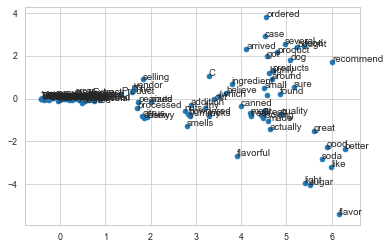

In [83]:
# create a scatter plot of the projection

num_samples = 100

result = result[:num_samples]
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)[:num_samples]
print(words)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [84]:
import hdbscan
import seaborn as sns
import sklearn.datasets as data
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('paper')
sns.set_style('whitegrid')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(result)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

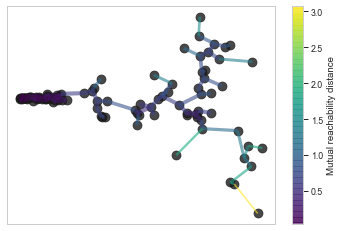

In [85]:
# Create MST
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=1.6)

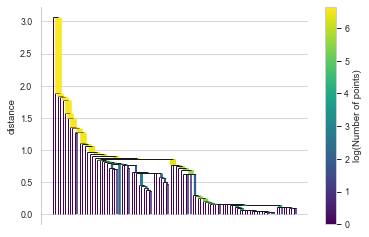

In [86]:
# Create cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

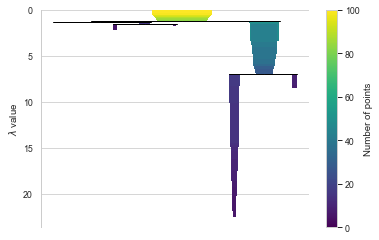

In [87]:
# Condense cluster tree
clusterer.condensed_tree_.plot()

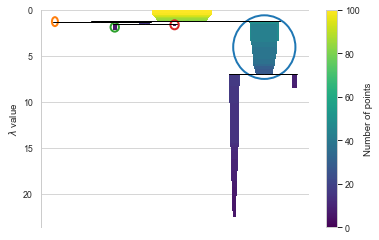

In [88]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

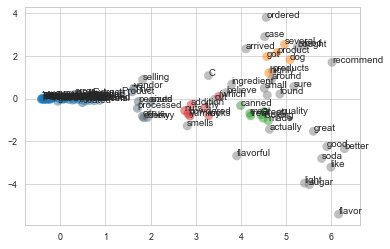

In [89]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(result.T[0], result.T[1], c=cluster_colors, **plot_kwds)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()